In [120]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

WORKDIR = "csv/"
EXT = '.csv'
VOL_AVG_PERIOD = 20

In [30]:
df2 = pd.read_csv('etf_info_vol' + str(VOL_AVG_PERIOD)  + '_clean.csv')
df2['endDate'] =  pd.to_datetime(df2['endDate'])
df2['startDate'] =  pd.to_datetime(df2['startDate'])
df2.drop(df2.columns[0] ,axis=1, inplace=True)

In [110]:
lista1 = ['imeu','ceu','smea']
lista1 = ['inaa','iusa','csspx']
lista1 = ['xgle', 'ibtm', 'ibgm', 'ibgl','em15']
lista1 = ['iusa','imeu','ibtm','xgle','phau']

In [111]:

ticker10 = [x.upper()+'.MI' for x in lista1]
df4 = df2[df2.ticker.isin(ticker10)]

sources1 = df4.dataSource.tolist()

ticker1 = df4.ticker.tolist()
ticker1 = [x.lower().split('.')[0] for x in ticker1]

df100 = pd.DataFrame()
for source in sources1:
    filename = WORKDIR + source + EXT
    df_t = pd.read_csv(filename, usecols=[1,2,3,4,5,6], index_col=0, parse_dates=True, dayfirst=True)
    df100 = df100.join(df_t.close,how='outer',rsuffix='_'+source)
    
df100.columns = ticker1


In [104]:
# correzione SMEA
#x1 = df100.smea.idxmin()
#df100.smea.loc[x1] = df100.smea.loc[x1 - pd.Timedelta(days=1)]

In [105]:
datebuone = pd.DataFrame(columns=['primaData'])
for col_name, data in df100.items(): 
    a = data.first_valid_index()
    datebuone.loc[col_name] = a

prima_data_buona = datebuone.primaData.max()
datebuone

,primaData
ibtm,2007-03-20
ibgm,2007-03-20
ibgl,2007-03-20
xgle,2007-11-06
em15,2007-10-25


In [113]:
# prima data valida 
#df101 = df100[df100.index >= '2010-05-26']
df101 = df100[df100.index >= prima_data_buona]

# back-fill i NaN
df102 = df101.fillna(method='bfill')

df200 = df102.copy()


In [107]:
norm_df200 = df200/df200.iloc[0]

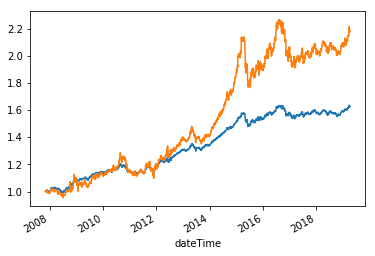

In [109]:
norm_df200.xgle.plot()
norm_df200.em15.plot()

In [125]:
from portfolio import *

lista1 = ['iusa','imeu','ibtm','xgle','phau']

df = read_quotes(lista1)


In [128]:
df.to_csv('quote_mach2.csv')